In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data=pd.read_excel(r"C:\Users\HP\Downloads\Clustering\Clustering\EastWestAirlines.xlsx",sheet_name='data')
data.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [3]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [4]:
data_new=data.drop(['ID#','Award?'],axis=1)
data_new

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [5]:
#sns.pairplot(data_new)
#plt.show()

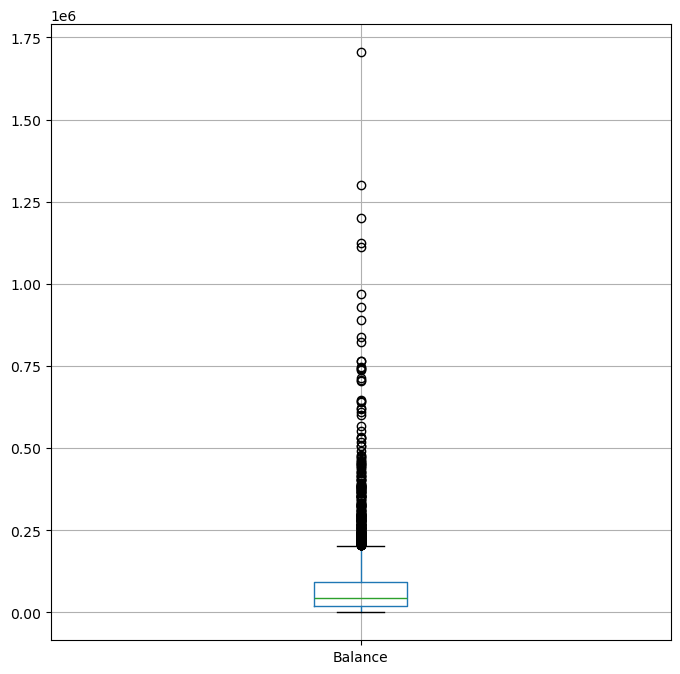

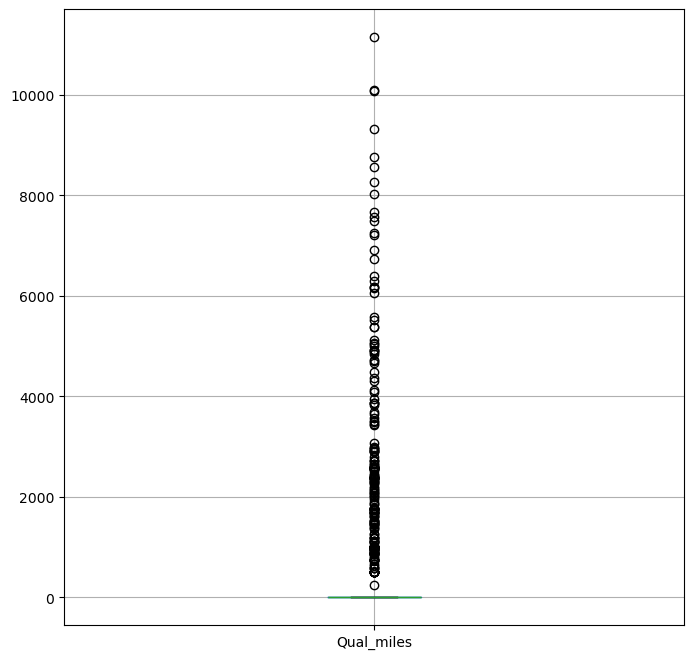

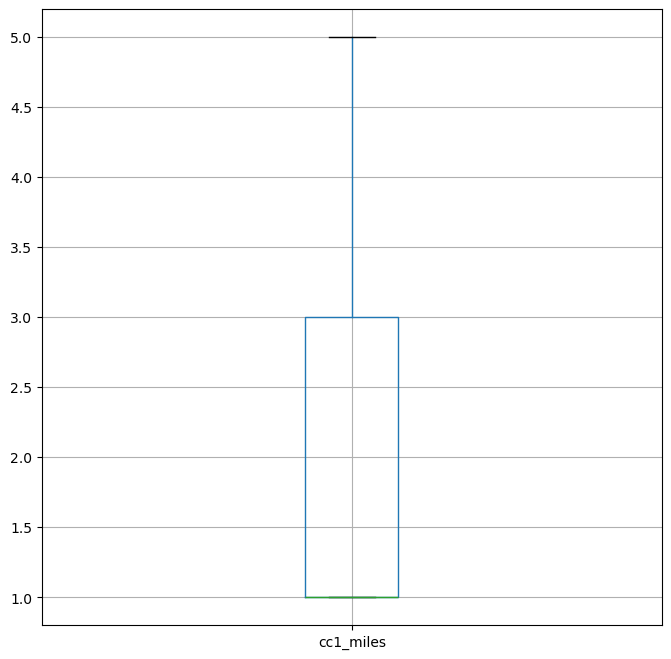

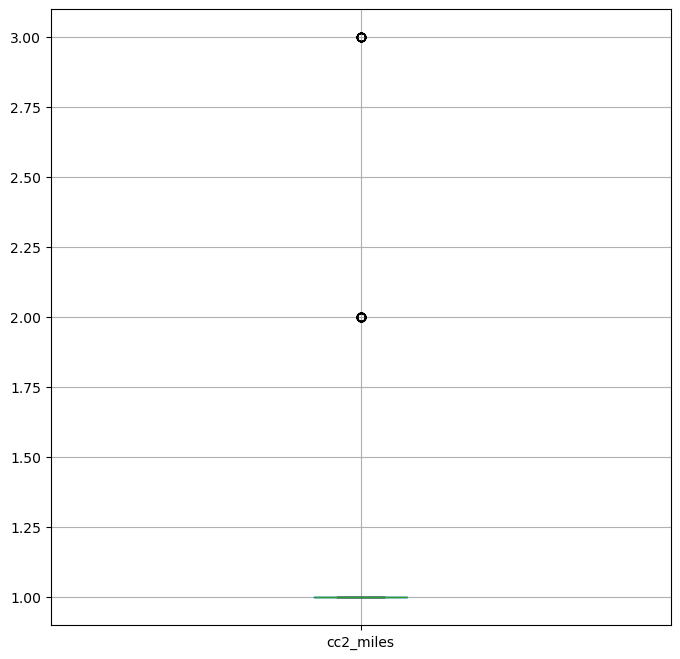

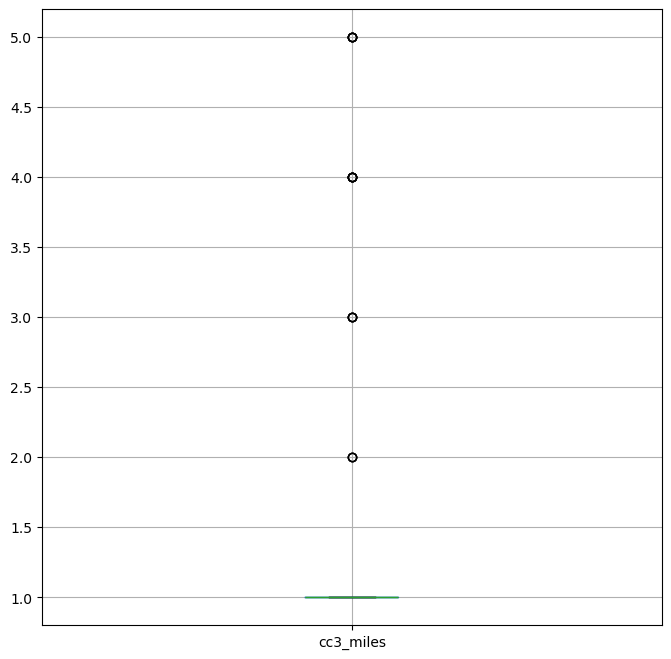

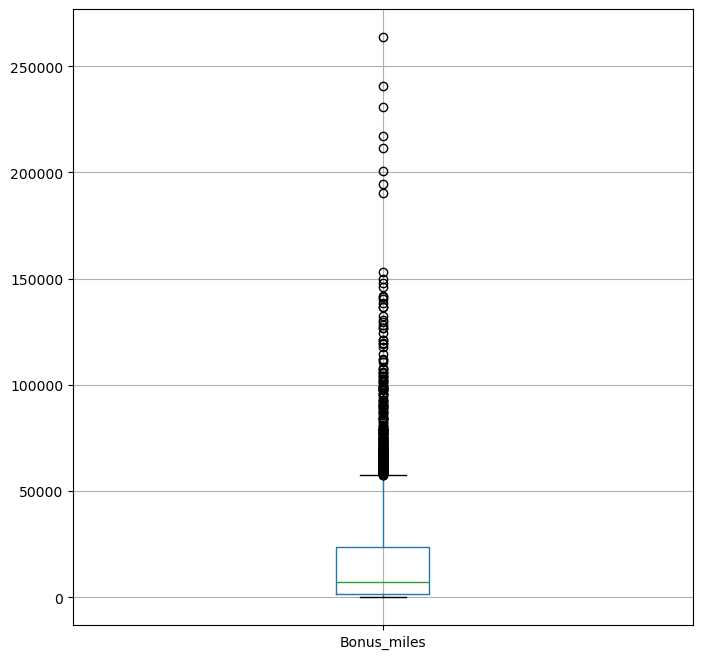

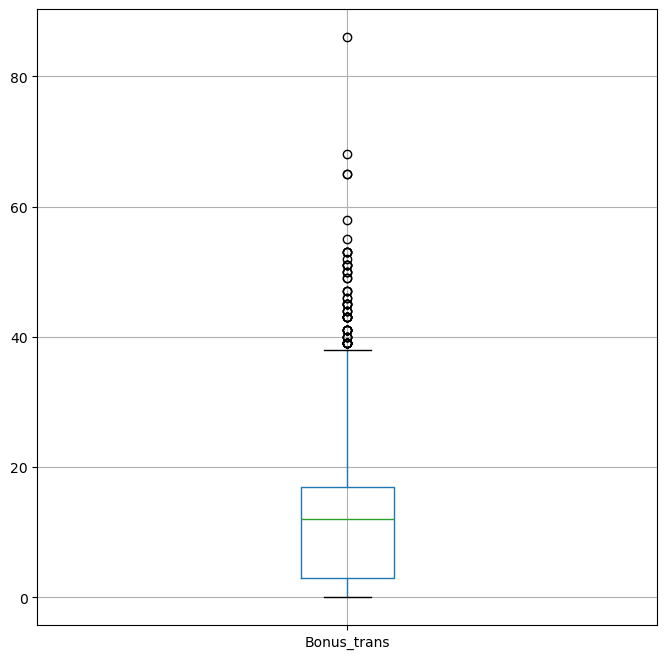

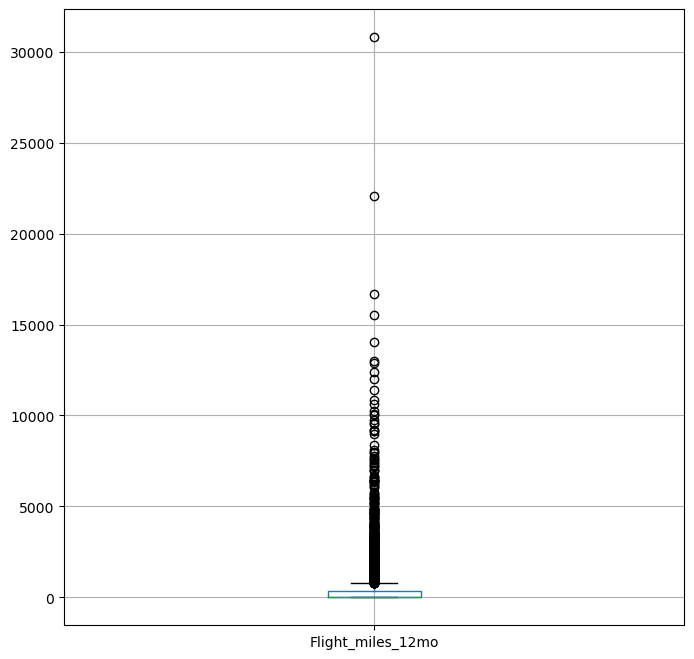

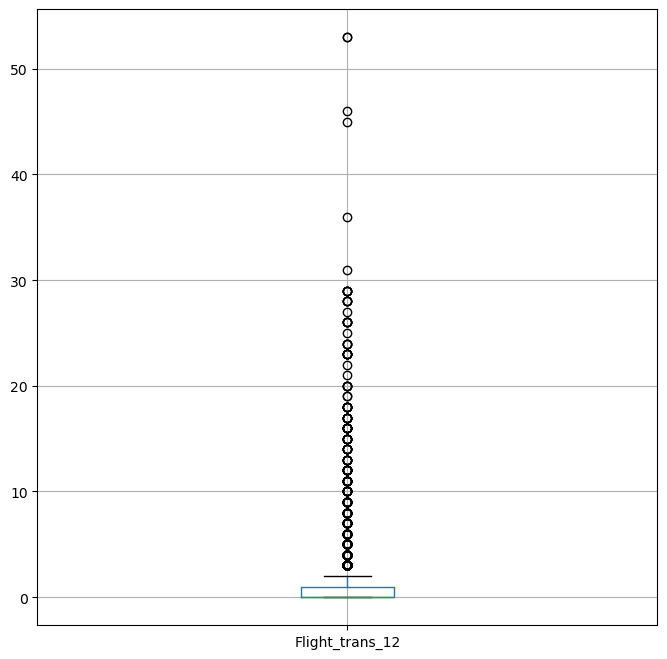

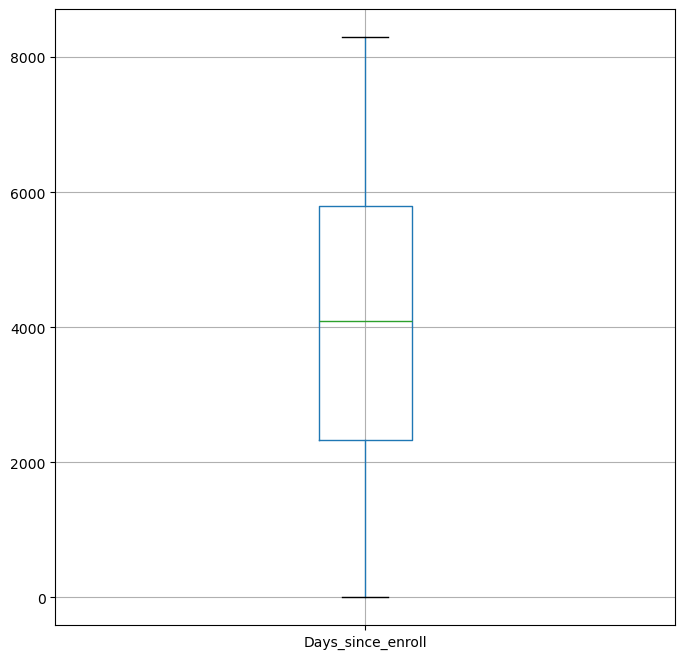

In [6]:
n=len(data_new.columns)
for i in range(0,n):
    plt.figure(figsize=[8,8])
    data_new.boxplot(column=[data_new.columns[i]])
    plt.show()

In [7]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [8]:
print(data_new.shape)
lr_bal,ur_bal=remove_outlier(data_new['Balance'])
data_new['Balance']=np.where(data_new['Balance']>ur_bal,ur_bal,data_new['Balance'])
data_new['Balance']=np.where(data_new['Balance']<lr_bal,lr_bal,data_new['Balance'])

lr_bonus_mile,ur_bonus_mile=remove_outlier(data_new['Bonus_miles'])
data_new['Bonus_miles']=np.where(data_new['Bonus_miles']>ur_bonus_mile,ur_bonus_mile,data_new['Bonus_miles'])
data_new['Bonus_miles']=np.where(data_new['Bonus_miles']<lr_bonus_mile,lr_bonus_mile,data_new['Bonus_miles'])

lr_bonus_trans,ur_bonus_trans=remove_outlier(data_new['Bonus_trans'])
data_new['Bonus_trans']=np.where(data_new['Bonus_trans']>ur_bonus_trans,ur_bonus_trans,data_new['Bonus_trans'])
data_new['Bonus_trans']=np.where(data_new['Bonus_trans']<lr_bonus_trans,lr_bonus_trans,data_new['Bonus_trans'])

lr_Flight_miles_12mo,ur_Flight_miles_12mo=remove_outlier(data_new['Flight_miles_12mo'])
data_new['Flight_miles_12mo']=np.where(data_new['Flight_miles_12mo']>ur_Flight_miles_12mo,ur_Flight_miles_12mo,data_new['Flight_miles_12mo'])
data_new['Flight_miles_12mo']=np.where(data_new['Flight_miles_12mo']<lr_Flight_miles_12mo,lr_Flight_miles_12mo,data_new['Flight_miles_12mo'])

lr_Flight_trans_12,ur_Flight_trans_12=remove_outlier(data_new['Flight_trans_12'])
data_new['Flight_trans_12']=np.where(data_new['Flight_trans_12']>ur_Flight_trans_12,ur_Flight_trans_12,data_new['Flight_trans_12'])
data_new['Flight_trans_12']=np.where(data_new['Flight_trans_12']<lr_Flight_trans_12,lr_Flight_trans_12,data_new['Flight_trans_12'])

print(data_new.shape)

(3999, 10)
(3999, 10)


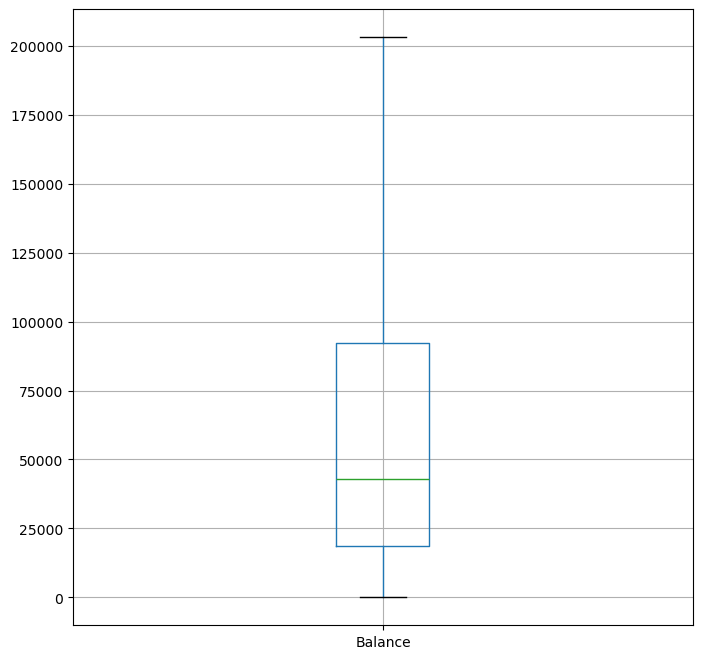

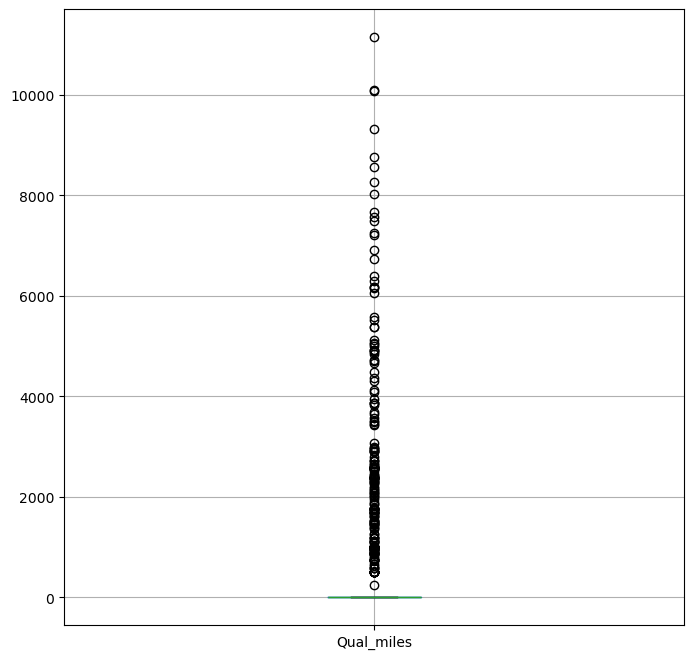

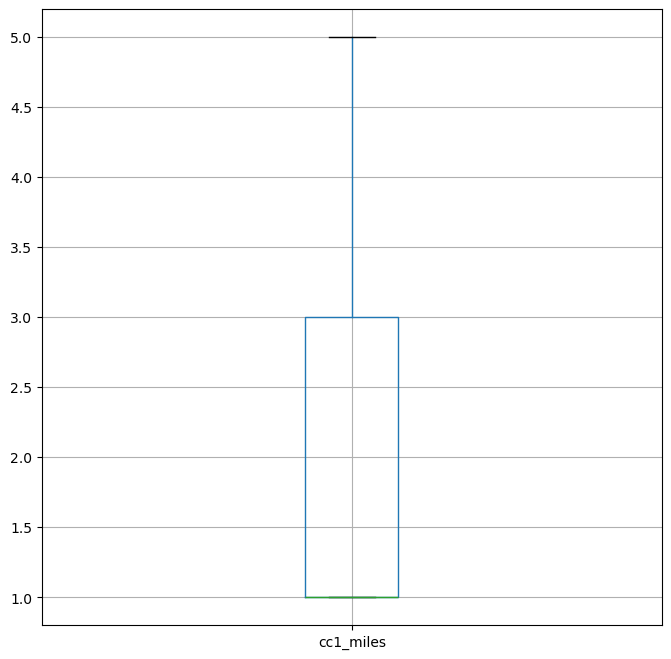

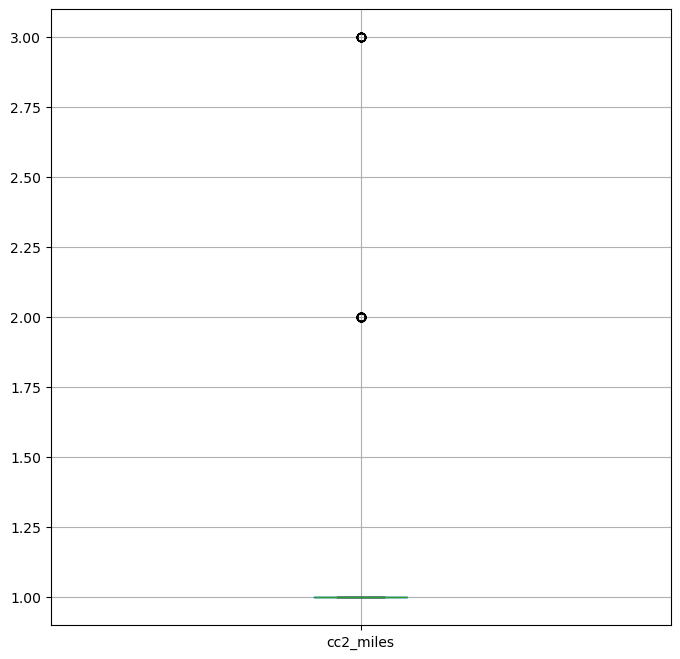

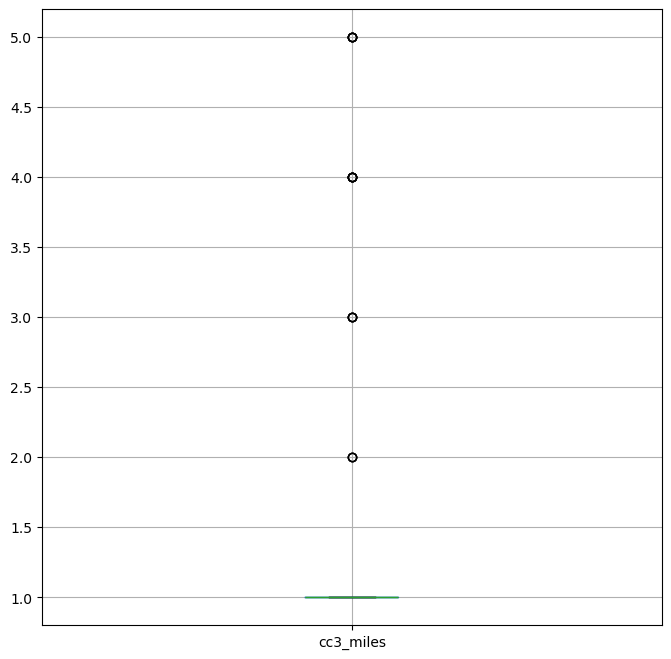

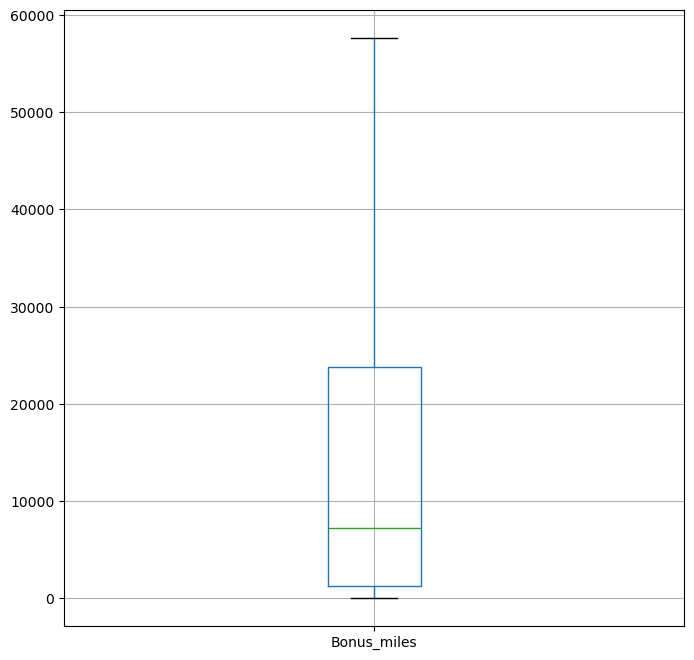

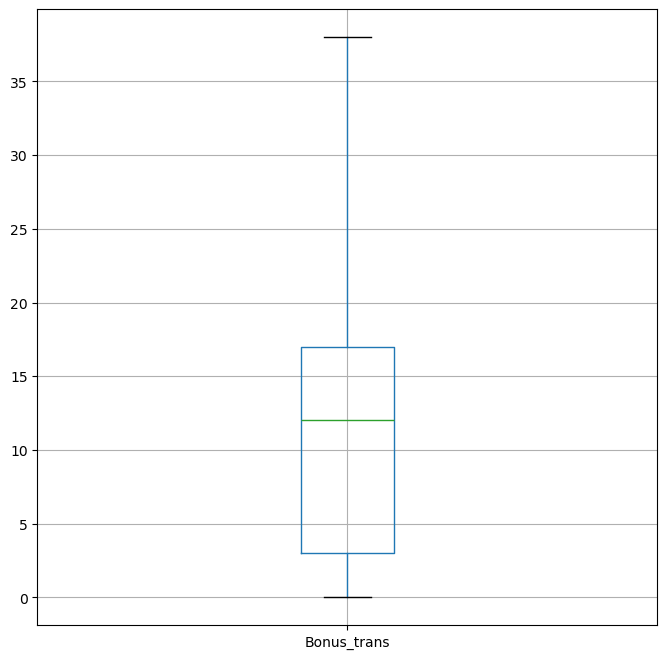

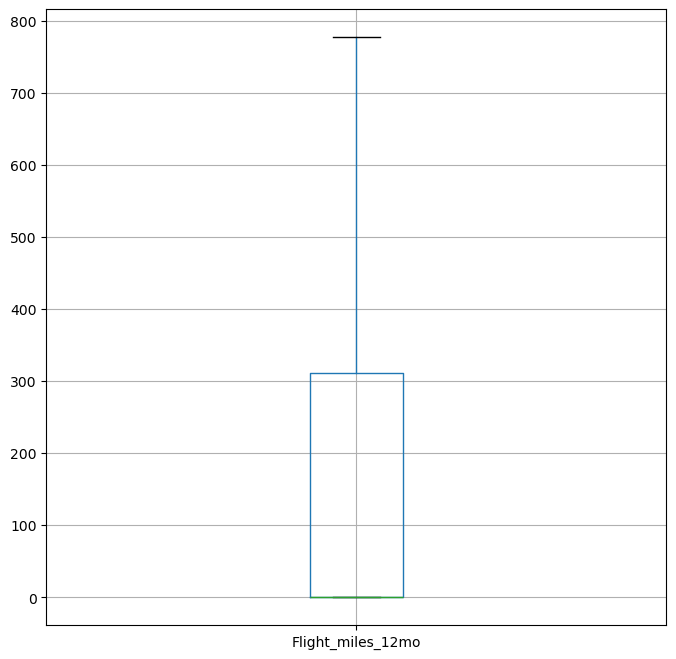

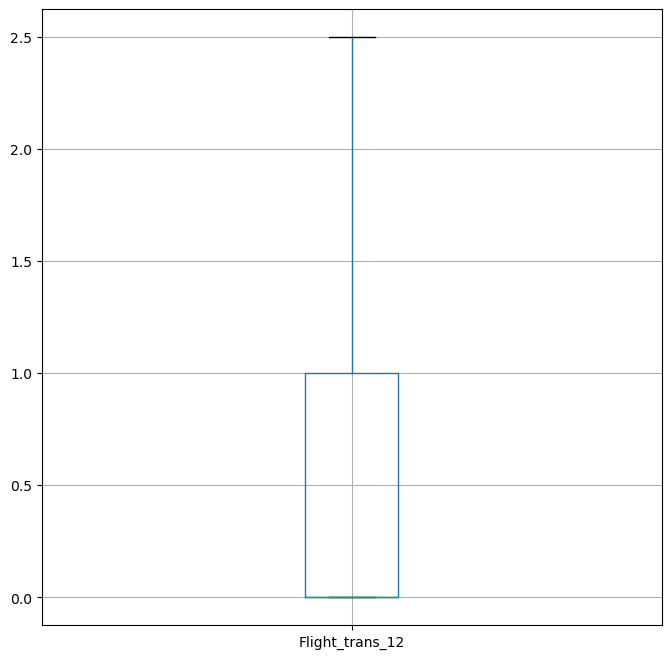

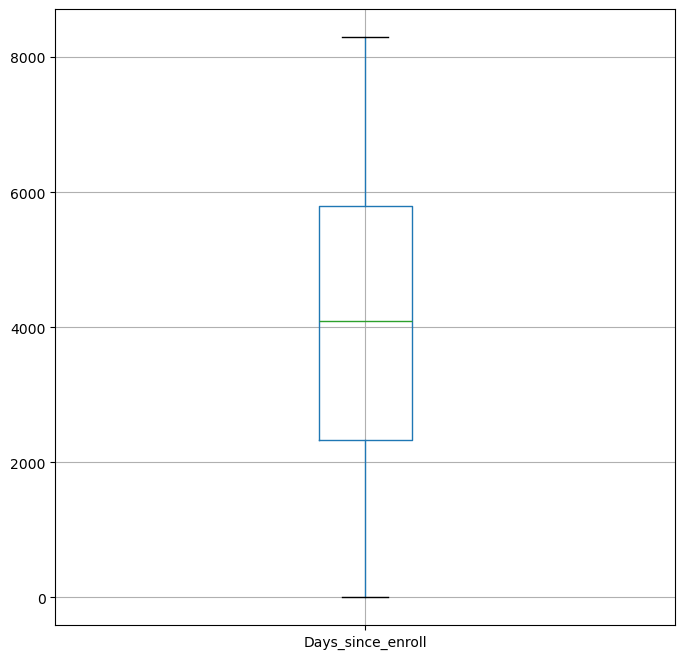

In [9]:
n=len(data_new.columns)
for i in range(0,n):
    plt.figure(figsize=[8,8])
    data_new.boxplot(column=[data_new.columns[i]])
    plt.show()

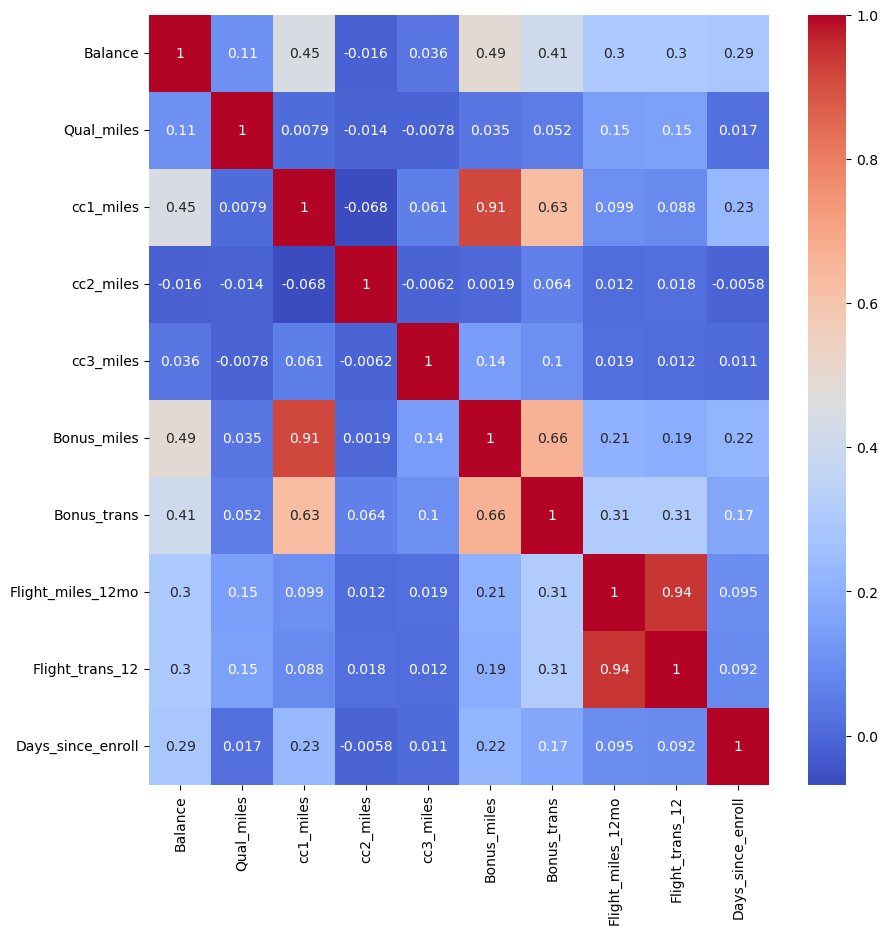

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(data_new.corr(),annot=True,cmap='coolwarm')
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler=StandardScaler()
scaled_data=scaler.fit_transform(data_new)
scaled_data

array([[-0.60725829, -0.18629869, -0.76957841, ..., -0.60431348,
        -0.62614341,  1.39545434],
       [-0.75894657, -0.18629869, -0.76957841, ..., -0.60431348,
        -0.62614341,  1.37995704],
       [-0.38206963, -0.18629869, -0.76957841, ..., -0.60431348,
        -0.62614341,  1.41192021],
       ...,
       [ 0.1675298 , -0.18629869,  0.68312117, ..., -0.60431348,
        -0.62614341, -1.31560393],
       [-0.15118775, -0.18629869, -0.76957841, ...,  1.09266586,
         0.43238439, -1.31608822],
       [-1.03556163, -0.18629869, -0.76957841, ..., -0.60431348,
        -0.62614341, -1.31754109]], shape=(3999, 10))

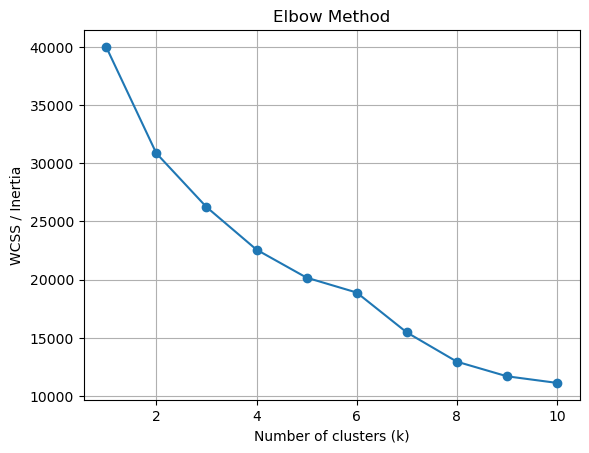

In [12]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data) # Your standardized data
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS / Inertia')
plt.grid(True)
plt.show()

In [13]:
df=data_new.copy()
kmeans_model=KMeans(n_clusters=5,init='k-means++',random_state=42)
df['Cluster ID']=kmeans_model.fit_predict(scaled_data)
df['Cluster ID']
#cluster_labels=KMeans(n_clusters=5,init='k-means++',random_state=42)
#print(cluster_labels)

0       1
1       1
2       1
3       1
4       4
       ..
3994    1
3995    1
3996    2
3997    0
3998    1
Name: Cluster ID, Length: 3999, dtype: int32

In [14]:
cluster_profile = df.groupby('Cluster ID').mean()
print(cluster_profile)

                  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Cluster ID                                                               
0            74979.586871  393.534591   1.216981   1.015723   1.000000   
1            32374.766684   62.558394   1.137643   1.020855   1.000000   
2            89911.860605   58.761036   3.513436   1.000960   1.002879   
3           102441.716667   78.800000   3.466667   1.000000   4.066667   
4           128876.727448  370.175258   4.038660   1.018041   1.000000   

             Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
Cluster ID                                                                  
0            7615.987814    10.473270         636.103774         2.066824   
1            3532.382690     6.064129          12.235662         0.064651   
2           30680.902111    16.841651          28.851248         0.123800   
3           55485.600000    27.533333         298.833333         0.866667   
4           44347.5

In [15]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster ID
0,28143.0,0,1,1,1,174.0,1.0,0.0,0.0,7000,1
1,19244.0,0,1,1,1,215.0,2.0,0.0,0.0,6968,1
2,41354.0,0,1,1,1,4123.0,4.0,0.0,0.0,7034,1
3,14776.0,0,1,1,1,500.0,1.0,0.0,0.0,6952,1
4,97752.0,0,4,1,1,43300.0,26.0,777.5,2.5,6935,4
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0,1,1,1,8525.0,4.0,200.0,1.0,1403,1
3995,64385.0,0,1,1,1,981.0,5.0,0.0,0.0,1395,1
3996,73597.0,0,3,1,1,25447.0,8.0,0.0,0.0,1402,2
3997,54899.0,0,1,1,1,500.0,1.0,500.0,1.0,1401,0


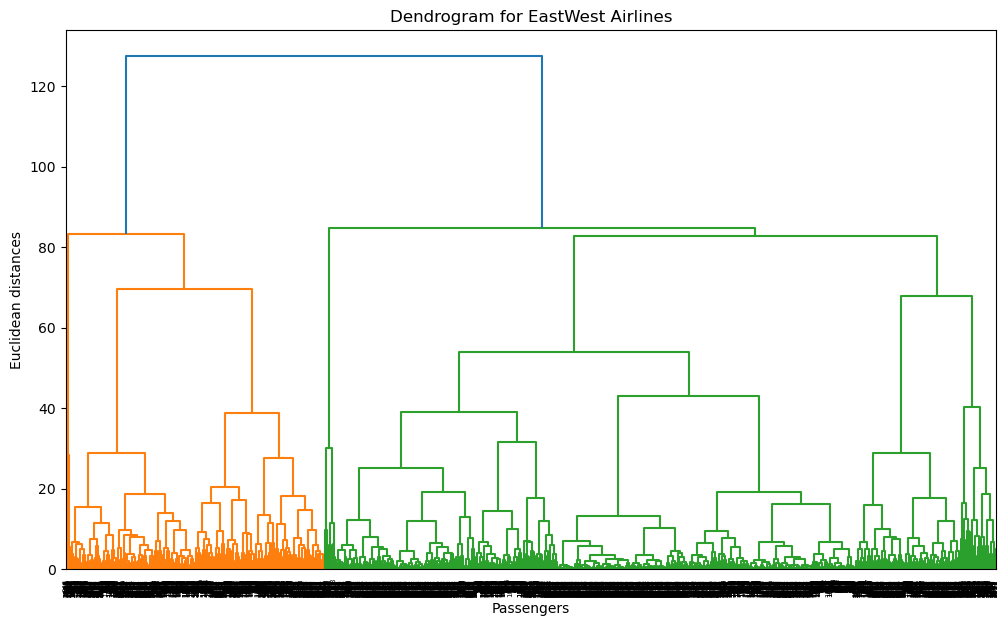

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster ID,HC_Cluster
0,28143.0,0,1,1,1,174.0,1.0,0.0,0.0,7000,1,4
1,19244.0,0,1,1,1,215.0,2.0,0.0,0.0,6968,1,4
2,41354.0,0,1,1,1,4123.0,4.0,0.0,0.0,7034,1,4
3,14776.0,0,1,1,1,500.0,1.0,0.0,0.0,6952,1,4
4,97752.0,0,4,1,1,43300.0,26.0,777.5,2.5,6935,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0,1,1,1,8525.0,4.0,200.0,1.0,1403,1,1
3995,64385.0,0,1,1,1,981.0,5.0,0.0,0.0,1395,1,4
3996,73597.0,0,3,1,1,25447.0,8.0,0.0,0.0,1402,2,4
3997,54899.0,0,1,1,1,500.0,1.0,500.0,1.0,1401,0,1


In [16]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Create the Dendrogram to find the number of clusters
plt.figure(figsize=(12, 7))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward'))
plt.title('Dendrogram for EastWest Airlines')
plt.xlabel('Passengers')
plt.ylabel('Euclidean distances')
plt.show()

# Fit the Model
# Based on the dendrogram, you choose where to "cut" the tree (e.g., 5 clusters)
hc_model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
df['HC_Cluster'] = hc_model.fit_predict(scaled_data)
df

In [17]:
# View the average characteristics of the hierarchical clusters
print(df.groupby('HC_Cluster').mean())

                  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
HC_Cluster                                                               
0           109393.326186   53.315693   3.744526   1.000000   1.000000   
1            56559.636589  826.935430   1.208609   1.000000   1.000000   
2            55181.470930   23.255814   1.139535   2.348837   1.000000   
3           100268.319444   65.666667   3.388889   1.000000   3.722222   
4            43242.196381    7.251564   1.470956   1.000000   1.000000   

             Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
HC_Cluster                                                                  
0           37868.616332    19.864964         335.290146         1.072993   
1            6855.956954     8.086093         511.003311         1.715232   
2           14409.773256    17.139535         208.906977         0.755814   
3           52595.458333    25.777778         249.027778         0.722222   
4            6441.5

In [18]:
from sklearn.cluster import DBSCAN

# Initialize and Fit
# eps: radius of the neighborhood
# min_samples: minimum points to form a dense region
dbscan_model = DBSCAN(eps=1.5, min_samples=5)
db_scan_labels = dbscan_model.fit_predict(scaled_data)

# 3. Add labels back to your dataframe
df['DBSCAN_Cluster'] = db_scan_labels

# Note: Labels of -1 indicate "Noise" (Outliers)
print(df['DBSCAN_Cluster'].value_counts())
df

DBSCAN_Cluster
 0    3831
-1     142
 1      16
 2      10
Name: count, dtype: int64


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster ID,HC_Cluster,DBSCAN_Cluster
0,28143.0,0,1,1,1,174.0,1.0,0.0,0.0,7000,1,4,0
1,19244.0,0,1,1,1,215.0,2.0,0.0,0.0,6968,1,4,0
2,41354.0,0,1,1,1,4123.0,4.0,0.0,0.0,7034,1,4,0
3,14776.0,0,1,1,1,500.0,1.0,0.0,0.0,6952,1,4,0
4,97752.0,0,4,1,1,43300.0,26.0,777.5,2.5,6935,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0,1,1,1,8525.0,4.0,200.0,1.0,1403,1,1,0
3995,64385.0,0,1,1,1,981.0,5.0,0.0,0.0,1395,1,4,0
3996,73597.0,0,3,1,1,25447.0,8.0,0.0,0.0,1402,2,4,0
3997,54899.0,0,1,1,1,500.0,1.0,500.0,1.0,1401,0,1,0


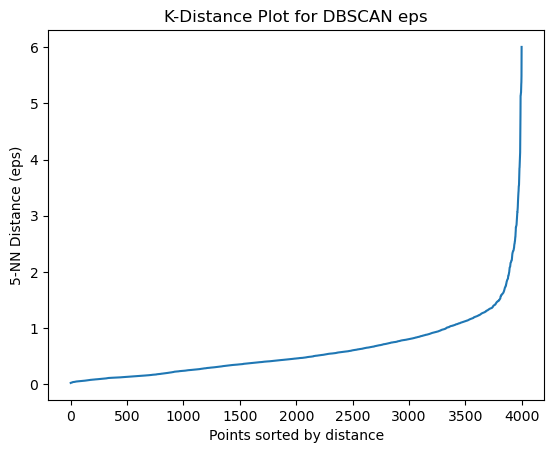

In [19]:
from sklearn.neighbors import NearestNeighbors

# Calculate the distance to the nearest n neighbors (e.g., n=5)
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(scaled_data)
distances, indices = nbrs.kneighbors(scaled_data)

# Sort and plot the distances
distances = np.sort(distances[:, 4], axis=0)
plt.plot(distances)
plt.title('K-Distance Plot for DBSCAN eps')
plt.xlabel('Points sorted by distance')
plt.ylabel('5-NN Distance (eps)')
plt.show()

In [20]:
#The point where the distance increases sharply is your optimal eps value.

 K : 2 | Silhouette score : 0.3213043090662581
 K : 3 | Silhouette score : 0.33445264994075624
 K : 4 | Silhouette score : 0.33787704490297693
 K : 5 | Silhouette score : 0.3091452817298713
 K : 6 | Silhouette score : 0.2578644097849515
 K : 7 | Silhouette score : 0.26246487981643535
 K : 8 | Silhouette score : 0.27519369256030873
 K : 9 | Silhouette score : 0.2664389509299376
 K : 10 | Silhouette score : 0.2615077248214608


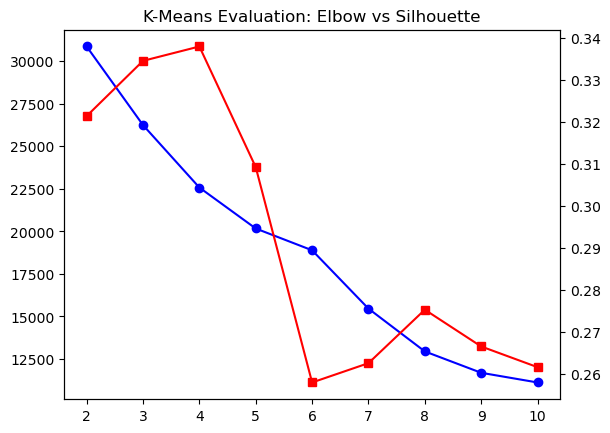

In [21]:
from sklearn.metrics import silhouette_score

# Testing K values from 2 to 10
wcss = []
silhouette_avgs = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans_labels = kmeans.fit_predict(scaled_data)
    wcss.append(kmeans.inertia_)
    silhouette_avgs.append(silhouette_score(scaled_data, kmeans_labels))
    print(f" K : {k} | Silhouette score : {silhouette_score(scaled_data, kmeans_labels)}")

# Plotting results
fig, ax1 = plt.subplots()
ax1.plot(range(2, 11), wcss, 'b-o', label='WCSS (Inertia)')
ax2 = ax1.twinx()
ax2.plot(range(2, 11), silhouette_avgs, 'r-s', label='Silhouette Score')
plt.title('K-Means Evaluation: Elbow vs Silhouette')
plt.show()

In [22]:
print(silhouette_avgs)

[np.float64(0.3213043090662581), np.float64(0.33445264994075624), np.float64(0.33787704490297693), np.float64(0.3091452817298713), np.float64(0.2578644097849515), np.float64(0.26246487981643535), np.float64(0.27519369256030873), np.float64(0.2664389509299376), np.float64(0.2615077248214608)]


In [23]:
# here cluster having k=4 is having the high silhouette score

In [24]:
# Experimenting with Linkage
for link in ['ward', 'complete', 'average']:
    hc = AgglomerativeClustering(n_clusters=2, linkage=link)
    linkage_labels = hc.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, linkage_labels)
    print(f"Linkage: {link:8} | Silhouette Score: {score:.3f}")

Linkage: ward     | Silhouette Score: 0.305
Linkage: complete | Silhouette Score: 0.773
Linkage: average  | Silhouette Score: 0.773


In [25]:
for link in ['ward', 'complete', 'average']:
    hc = AgglomerativeClustering(n_clusters=5, linkage=link)
    linkage_labels_1 = hc.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, linkage_labels_1)
    print(f"Linkage: {link:8} | Silhouette Score: {score:.3f}")

Linkage: ward     | Silhouette Score: 0.293
Linkage: complete | Silhouette Score: 0.517
Linkage: average  | Silhouette Score: 0.633


In [26]:
# when cluster size is 5 the silhouette score is much low than when cluster size is 2, here also for the linkage method average the silhouette score is high

In [27]:
# Experimenting with epsilon
eps_values = [0.5, 1.0, 1.5, 2.0]
for e in eps_values:
    db = DBSCAN(eps=e, min_samples=11)
    eps_labels = db.fit_predict(scaled_data)
    n_clusters = len(set(eps_labels)) - (1 if -1 in eps_labels else 0)
    n_noise = list(eps_labels).count(-1)
    print(f"Eps: {e} | Clusters: {n_clusters} | Noise Points: {n_noise} | Silhoutte score : {silhouette_score(scaled_data, eps_labels)}")

Eps: 0.5 | Clusters: 8 | Noise Points: 2039 | Silhoutte score : -0.16983864374539365
Eps: 1.0 | Clusters: 8 | Noise Points: 695 | Silhoutte score : 0.04800563875464095
Eps: 1.5 | Clusters: 2 | Noise Points: 192 | Silhoutte score : 0.5001411799525055
Eps: 2.0 | Clusters: 2 | Noise Points: 109 | Silhoutte score : 0.5191809019779791


In [28]:
print(df.groupby('DBSCAN_Cluster').mean())

                      Balance   Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
DBSCAN_Cluster                                                                
-1              105391.000000  2816.352113   2.464789    1.15493    1.34507   
 0               62422.184678    46.043331   2.051684    1.00000    1.00000   
 1               37553.250000     0.000000   1.000000    2.00000    1.00000   
 2               30501.100000     0.000000   1.000000    3.00000    1.00000   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
DBSCAN_Cluster                                                                  
-1              28083.389085    18.816901         420.278169         1.404930   
 0              14973.372422    11.186896         170.181415         0.564866   
 1               7977.000000    12.000000           0.000000         0.000000   
 2              14904.900000    15.000000          40.000000         0.200000   

                Days_since_enroll  Clu

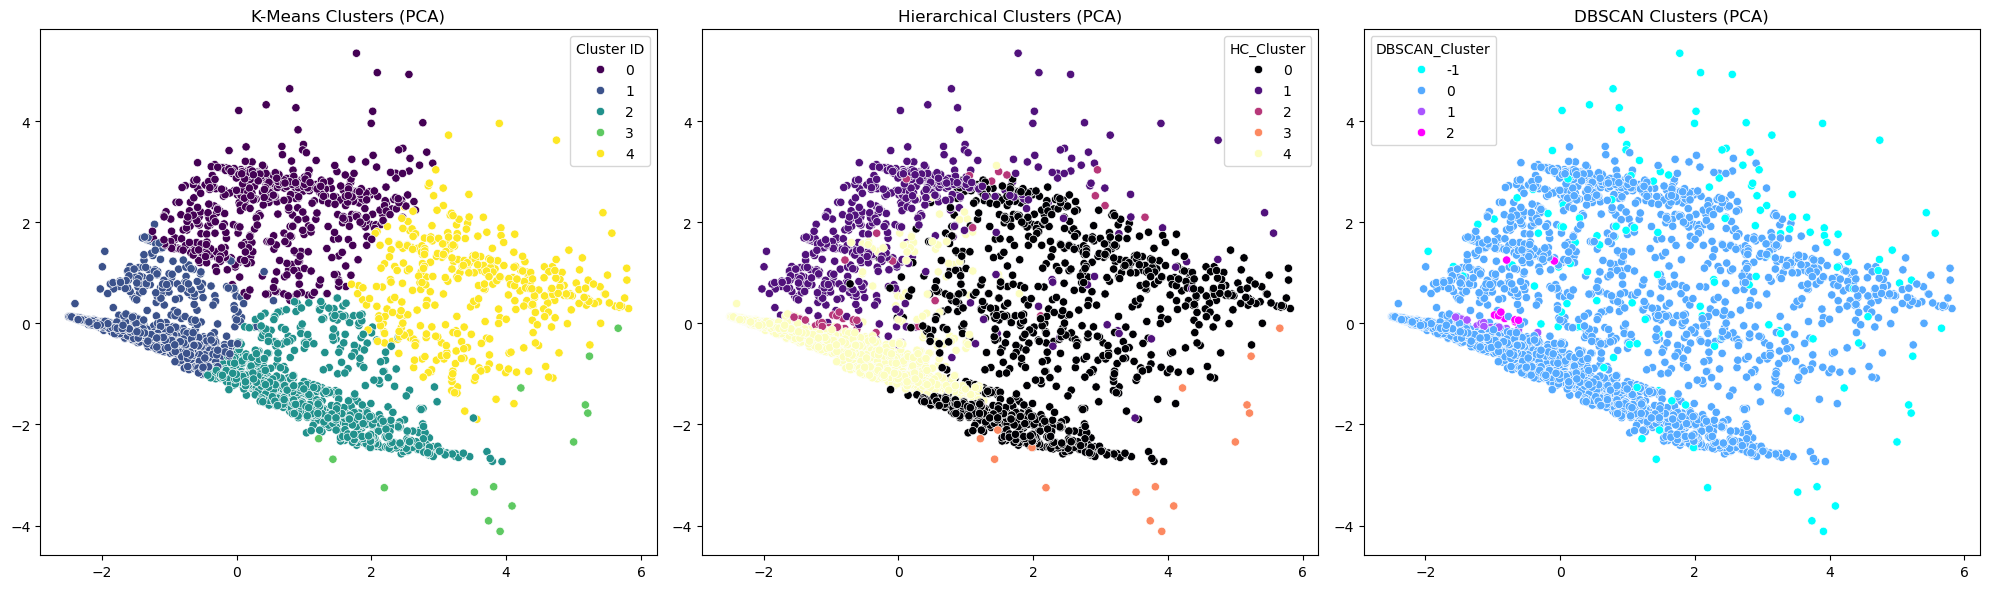

In [29]:
from sklearn.decomposition import PCA

# 1. Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# 2. Create the plots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# K-Means Plot
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['Cluster ID'], palette='viridis', ax=axes[0])
axes[0].set_title('K-Means Clusters (PCA)')

# Hierarchical Plot
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['HC_Cluster'], palette='magma', ax=axes[1])
axes[1].set_title('Hierarchical Clusters (PCA)')

# DBSCAN Plot
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['DBSCAN_Cluster'], palette='cool', ax=axes[2])
axes[2].set_title('DBSCAN Clusters (PCA)')

plt.tight_layout()
plt.show()